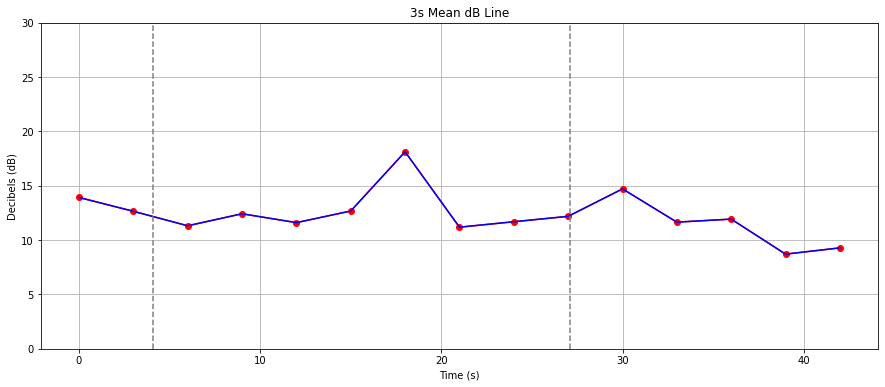

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa

# 파일 경로들 설정
file_paths = ['recorded_audio_100.mp3', 'recorded_audio_101.mp3', 'recorded_audio_104.mp3']

# 음성 파일 이어붙이기
y_concat = np.array([])
for file_path in file_paths:
    y, sr = librosa.load(file_path)
    y_concat = np.concatenate((y_concat, y))

# 음성 데이터의 길이 계산
duration = len(y_concat) / sr

# 3초마다 묶은 구간 수 계산
window_size = 3  # 3초
window_samples = int(window_size * sr)
num_windows = int(np.ceil(len(y_concat) / window_samples))

# 시간 벡터 생성
time = np.linspace(0, duration, len(y_concat))

# 데이터의 데시벨 크기 계산
db = 180 * np.abs(y_concat)

# 각 구간에 대한 데시벨 계산
mean_dbs = []
mean_times = []
start_time = 0
for i in range(num_windows):
    start = i * window_samples
    end = start + window_samples
    db_window = db[start:end]
    db_above_threshold = db_window[db_window >= 5]
    mean_db = np.mean(db_above_threshold) if len(db_above_threshold) > 0 else 0
    
    # 평균 값이 0인 구간은 건너뛰고 다음 점과 이어지도록 설정
    if mean_db <= 6:
        continue
    
    mean_dbs.append(mean_db)
    mean_times.append(start_time)
    start_time += window_size

# 그래프 그리기
plt.figure(figsize=(15, 6))

# 3초마다 평균 데시벨 점으로 나타내기
mean_times = np.array(mean_times)
mean_dbs = np.array(mean_dbs)
plt.plot(mean_times, mean_dbs, 'ro-', label='Mean dB')

# 점을 이어 그래프 그리기
plt.plot(mean_times, mean_dbs, 'b-', label='Connected Line')

# 음성 파일 이어붙인 구간 표시
for file_path in file_paths[:-1]:
    y, sr = librosa.load(file_path)
    duration = len(y) / sr
    plt.axvline(duration, color='gray', linestyle='--', label='Concatenate Point')

plt.xlabel('Time (s)')
plt.ylabel('Decibels (dB)')
plt.title('3s Mean dB Line')
plt.ylim(0, 30)  # y 축 범위 조정
plt.grid(True)
plt.savefig('voice.jpg', facecolor='white')
plt.show()
